# 標準化 Normalization

### 建立數據

In [1]:
from sklearn import preprocessing # 標準化數據庫
import numpy as np

# 建立Array
a = np.array([[10, 2.7, 3.6],
              [-100, 5, -2],
              [120, 20, 40]], dtype=np.float64)


### 比較不同標準化方式

In [2]:
# 使用 scale
print(preprocessing.scale(a))
print()

# 使用 StandardScaler
ss = preprocessing.StandardScaler().fit(a) # 當作標準化基準
print(ss.transform(a)) #對data_train進行標準化)

# 使用 minmaxscale
print(preprocessing.minmax_scale(a, feature_range = (-1,1)))

[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]

[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]
[[-2.77555756e-17 -1.00000000e+00 -7.33333333e-01]
 [-1.00000000e+00 -7.34104046e-01 -1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00]]


## 實際演練同時比較差異

In [3]:
from sklearn import preprocessing # 標準化數據庫
import numpy as np
from sklearn.model_selection import train_test_split                # 資料分割庫(訓練集、測試集)
from sklearn.datasets.samples_generator import make_classification  # 分類器相關
from sklearn.svm import SVC                                         # Support Vector Machine中的Support Vector Classifier
import matplotlib.pyplot as plt                                     #可視化視覺套件

c:\users\kaineng\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


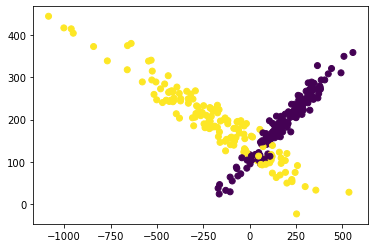

In [4]:
# 產生包含 2種特徵的 300 個數據
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2, 
    random_state=1, n_clusters_per_class=1, 
    scale=200)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

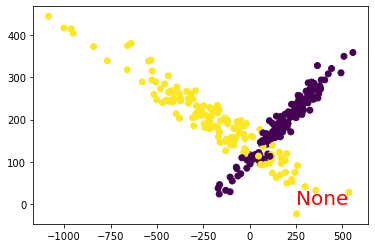

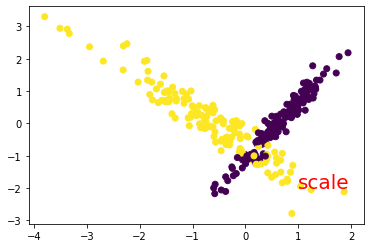

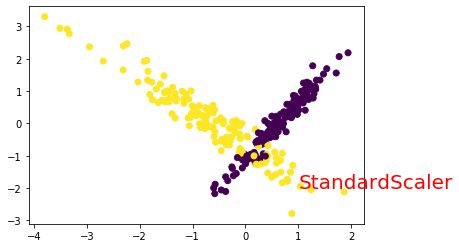

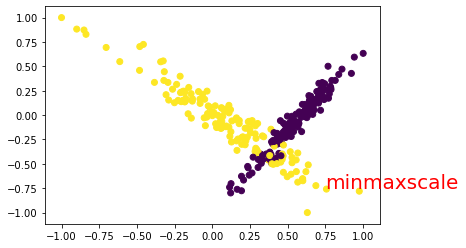

In [5]:
# 將數據標準化壓縮在範圍內但不該變數據間的關係  
# 使用 scale
X_scale = preprocessing.scale(X)

# 使用 StandardScaler
X_StandardScaler = preprocessing.StandardScaler().fit(X).transform(X) # 當作標準化基準

# 使用 minmaxscale
X_minmax_scale = preprocessing.minmax_scale(X, feature_range = (-1,1))


plt.scatter(X[:, 0], X[:, 1], c=y)
plt.text(250, 0, 'None', fontsize=20, color='r')
plt.show()

plt.scatter(X_scale[:, 0], X_scale[:, 1], c=y)
plt.text(1, -2, 'scale', fontsize=20, color='r')
plt.show()

plt.scatter(X_StandardScaler[:, 0], X_StandardScaler[:, 1], c=y)
plt.text(1, -2, 'StandardScaler', fontsize=20, color='r')
plt.show()

plt.scatter(X_minmax_scale[:, 0],X_minmax_scale[:, 1], c=y)
plt.text(0.75, -0.75, 'minmaxscale', fontsize=20, color='r')
plt.show()

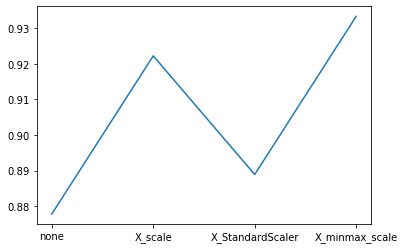

In [6]:
scores_num = []
Scaler_name = ['none', 'X_scale', 'X_StandardScaler', 'X_minmax_scale']
for Scaler_num in (X, X_scale, X_StandardScaler, X_minmax_scale):
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(Scaler_num, y, test_size=0.3)
        clf = SVC()
        clf.fit(X_train, y_train)
        scores = clf.score(X_test, y_test)
        # print(clf.score(X_test, y_test))
    scores_num.append(scores.mean())
    
plt.plot(Scaler_name, scores_num)